# Fun with FFT

Charles Boncelet, boncelet@udel.edu

In [1]:
%pylab inline
from scipy.fftpack import fft, ifft

Populating the interactive namespace from numpy and matplotlib


In [2]:
fft?

In [3]:
x = array([1,-1,1,-1])
fft(x)

array([ 0.+0.j,  0.+0.j,  4.+0.j,  0.-0.j])

In [4]:
fft(x,n=8)

array([ 0.+0.j        ,  1.+0.41421356j,  0.-0.j        ,  1.+2.41421356j,
        4.+0.j        ,  1.-2.41421356j,  0.+0.j        ,  1.-0.41421356j])

In [5]:
xz = r_[x,zeros(4)]
xz

array([ 1., -1.,  1., -1.,  0.,  0.,  0.,  0.])

In [6]:
fft(xz)

array([ 0.+0.j        ,  1.+0.41421356j,  0.-0.j        ,  1.+2.41421356j,
        4.+0.j        ,  1.-2.41421356j,  0.+0.j        ,  1.-0.41421356j])

In [7]:
c_[x,zeros(4)]

array([[ 1.,  0.],
       [-1.,  0.],
       [ 1.,  0.],
       [-1.,  0.]])

In [8]:
y = fft(x)
xhat = ifft(y)

In [9]:
x-xhat

array([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j])

In [10]:
x2 = rand(1024*1024)
y2 = fft(x2)
x2hat = ifft(y2)
r = x2-x2hat
r[:10]

array([ -3.33066907e-16 +0.00000000e+00j,
        -2.22044605e-16 +9.24282352e-18j,
         1.11022302e-16 +4.86771520e-17j,
        -2.77555756e-16 -2.56142763e-18j,
         2.22044605e-16 -4.10234997e-17j,
        -2.22044605e-16 -2.37440276e-17j,
         1.11022302e-16 +3.25024857e-17j,
         4.44089210e-16 +1.13539684e-16j,
        -5.55111512e-17 -6.84994020e-17j,  -1.11022302e-16 -1.78791851e-17j])

In [11]:
max(abs(x2-x2hat))

1.1211510962509477e-15

In [12]:
x2hat[:10]

array([ 0.53579690 +0.00000000e+00j,  0.67720281 -9.24282352e-18j,
        0.42497908 -4.86771520e-17j,  0.21797984 +2.56142763e-18j,
        0.98515371 +4.10234997e-17j,  0.54284684 +2.37440276e-17j,
        0.85362911 -3.25024857e-17j,  0.98754980 -1.13539684e-16j,
        0.19761983 +6.84994020e-17j,  0.83402650 +1.78791851e-17j])

In [13]:
real(x2hat)[:10]

array([ 0.5357969 ,  0.67720281,  0.42497908,  0.21797984,  0.98515371,
        0.54284684,  0.85362911,  0.9875498 ,  0.19761983,  0.8340265 ])

(0, 8)

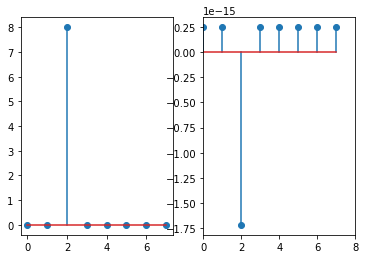

In [26]:
#x = array([0,0,0,1,0,0,0,0]) + 1j*array([0,0,0,0,0,0,0,0])
x = exp(1j*2*2*pi*arange(8)/8)
y = fft(x)
subplot(1,2,1)
stem(real(y))
subplot(1,2,2)
stem(imag(y))
xlim([0,8])

<Container object of 3 artists>

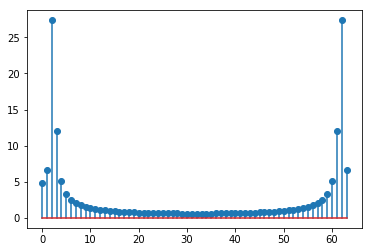

In [30]:
import matplotlib.pyplot as plt
N=64
omega = 2.3*2*pi/N
n = arange(N)
x = cos(omega*n)
y = fft(x)
#plt.plot(n,x)
stem(abs(y))

## Signal Filtering with FFTs

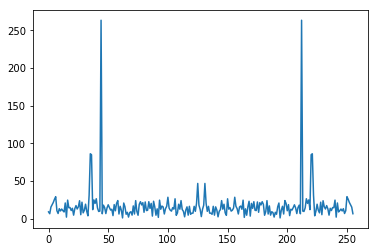

In [18]:
N=256
sigma = 1.0
omega = 2*pi*35.5/N
omega2 = 2*pi*44/N
#x = exp(omega*1j*arange(N))
x = cos(omega*arange(N))+2*cos(omega2*arange(N))
x += sigma*randn(N)
y = fft(x)
plot(abs(y))

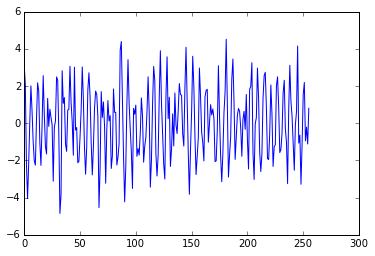

In [18]:
plot(x)

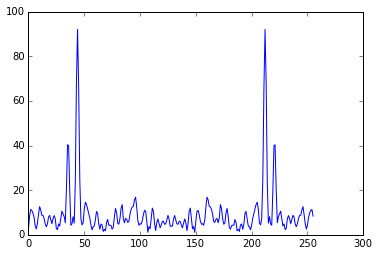

In [19]:
from scipy.signal import kaiser
window = kaiser(N,beta=14)
plot(abs(fft(x*window)))

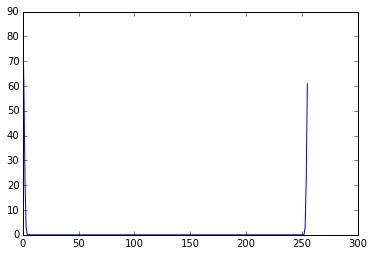

In [20]:
plot(abs(fft(window)))

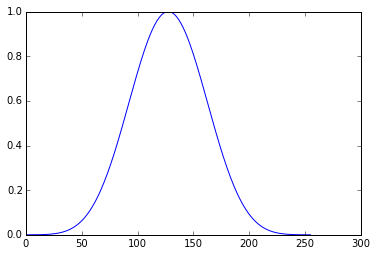

In [21]:
plot(window)